In [22]:
library(data.table)
library(ggplot2)
library(pipeR)
options(jupyter.plot_mimetypes = 'image/png')

In [2]:
idd_dataframe = fread('idd_dataframe.csv')

In [53]:
idd_dataframe[, list(measure_code, measure_name)] %>>% unique

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


    measure_code
 1:     OCCTOTAL
 2:   INCHCTOTAL
 3:         GINI
 4:        PVT5B
 5:       PVTAA4
 6:      CPI2010
 7:      PMEAN5A
 8:   PVTAHTOTAL
 9:       PVTAA6
10:    INCCTOTAL
11:        GINIB
12:        PALMA
13:       P90P10
14:       INCAC5
15:       PMED6A
16:       PVTAA1
17:   PVTBHTOTAL
18:    SEICTOTAL
19:       P50P10
20:  TRRERCTOTAL
21:         SHA2
22:          IND
23:      ECTOTAL
24:        PVT6A
25:      MEDIANC
26:       INCAC6
27:       P90P50
28:       S80S20
29:       PVTAA5
30:        PVT5A
31:      PMEAN6A
32:    TRRCTOTAL
33:       INCAC4
34:       S90S10
35:       PVTAA3
36:       PMED5A
37:       PVTAA2
38:  TRRSSCTOTAL
39:     KICTOTAL
40:       INCAC3
41:  TRROTCTOTAL
42:      KCTOTAL
43:     SECTOTAL
44:        GINIG
45:     TRCTOTAL
46:   INCACTOTAL
47:       PPPPRC
48:       PVTAA7
49:       INCAC7
50:     TACTOTAL
51:    TRPCTOTAL
52:         SHA1
53:  TRPOTCTOTAL
54:         SHA3
55:        PVT6B
56:         SHA4
57:       INCAC1
58:         SH

In [96]:
idd_dataframe %>>% names

[1] "time_period"     "observation"     "location"        "age"            
 [5] "definition"      "measure"         "methodo"         "definition_code"
 [9] "definition_name" "age_code"        "age_name"        "location_code"  
[13] "location_name"   "measure_code"    "measure_name"    "methodo_code"   
[17] "methodo_name"    "year"

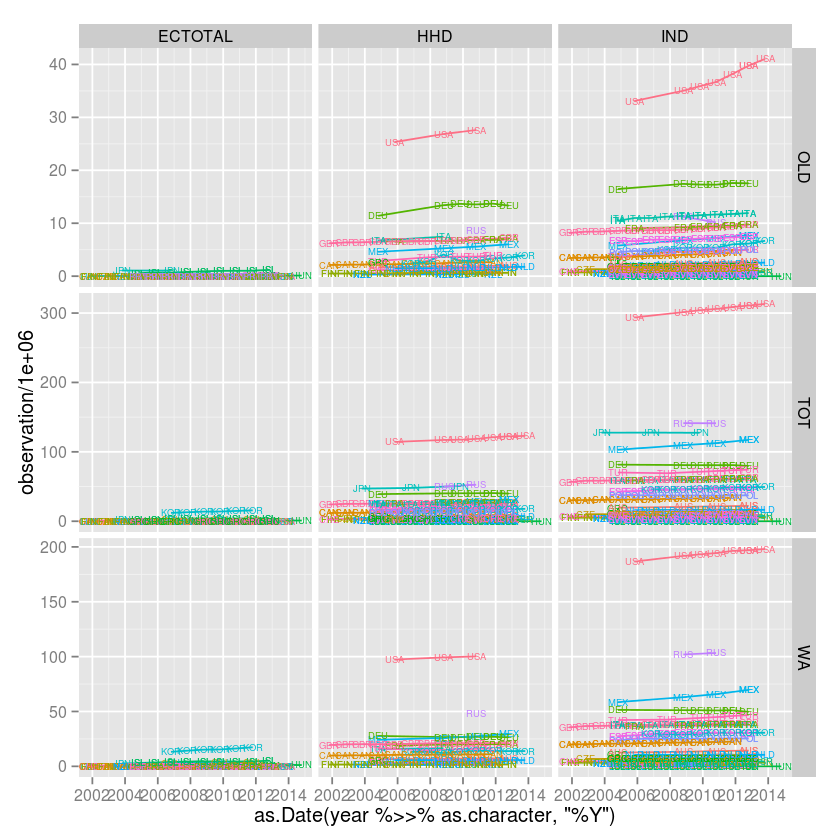

In [89]:

# figure out country size
#idd_dataframe[measure_name %like% "individuals|earnings|households", list(measure[1], measure_name[1]), by = measure_code]

# measure | summary
# 3  | total earnings
# 51 | total number of individuals
# 59 | total number of households
ggplot(data=idd_dataframe[measure %in% c(3,51,59)],
       aes(x=as.Date(year %>>% as.character, '%Y'),
           y=observation / 1E6,
           label=location_code,
           color=location_name)) +
geom_line() +
geom_text(size=2) +
scale_color_discrete(guide=FALSE) +
facet_grid("age_code~measure_code", scales="free")

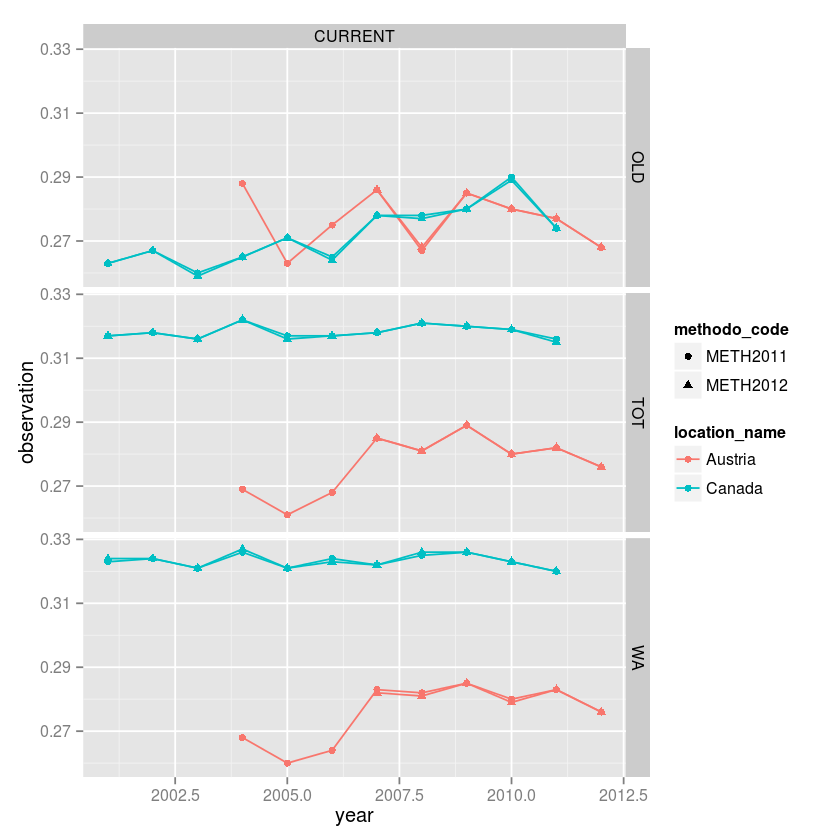

In [50]:
ggplot(data = idd_dataframe[measure_code=='GINI' &
                            location %in% c(1,3) &
                            definition==0 & # we only want to use the current definition, not 'incomparable' or 'previous'
                            methodo %in% c(0,1)],
       aes(x=year, y=observation, color=location_name, shape=methodo_code)) +
geom_line() +
geom_point() +
facet_grid("age_code~definition_code")


In [ ]:
ggplot(data=idd_dataframe[measure != 0][, group := paste0(location, '-', methodology)],
       aes(x=time,
           y=observation,
           color=location,
           shape=as.factor(methodology))) +
geom_line(aes(group=group)) +
geom_point() +
facet_grid("~measure", scales = 'free_y') +
theme_bw()

In [101]:
dcasted_data =
dcast(idd_dataframe,
      value.var = "observation",
      formula="time_period+year+location_name+methodo+age+definition~measure_code")

In [102]:
dcasted_data %>>% names

[1] "time_period"   "year"          "location_name" "methodo"      
 [5] "age"           "definition"    "CPI2010"       "ECTOTAL"      
 [9] "GINI"          "GINIB"         "GINIG"         "HHD"          
[13] "INCAC1"        "INCAC2"        "INCAC3"        "INCAC4"       
[17] "INCAC5"        "INCAC6"        "INCAC7"        "INCACTOTAL"   
[21] "INCCTOTAL"     "INCHCTOTAL"    "IND"           "KCTOTAL"      
[25] "KICTOTAL"      "MEDIANC"       "OCCTOTAL"      "P50P10"       
[29] "P90P10"        "P90P50"        "PALMA"         "PMEAN5A"      
[33] "PMEAN6A"       "PMED5A"        "PMED6A"        "PPPPRC"       
[37] "PVT5A"         "PVT5B"         "PVT6A"         "PVT6B"        
[41] "PVTAA1"        "PVTAA2"        "PVTAA3"        "PVTAA4"       
[45] "PVTAA5"        "PVTAA6"        "PVTAA7"        "PVTAATOTAL"   
[49] "PVTAHTOTAL"    "PVTBHTOTAL"    "S80S20"        "S90S10"       
[53] "SECTOTAL"      "SEICTOTAL"     "SHA1"          "SHA2"         
[57] "SHA3"          "SHA4"          "SHA5"          "SHA6"         
[61] "SHA7"          "STDG"          "TACTOTAL"      "TRCTOTAL"     
[65] "TRPCTOTAL"     "TRPERCTOTAL"   "TRPOTCTOTAL"   "TRRCTOTAL"    
[69] "TRRERCTOTAL"   "TRROTCTOTAL"   "TRRSSCTOTAL"

In [139]:
X <- dcasted_data[age==0][,group:=paste0(methodo,'-',location_name)]
Y <- idd_dataframe[,.SD[year==max(year) & age==0 & measure_code=='GINI',
                        list(year, 'GINI'=observation)],
                   by=location_name]

X <- merge(x=X, all.x=TRUE, by=c('year','GINI'), y=Y, suffixes=c("","_label"))

Warning message:
: Removed 33 rows containing missing values (geom_path).Warning message:
: Removed 265 rows containing missing values (geom_point).Warning message:
: Removed 451 rows containing missing values (geom_text).

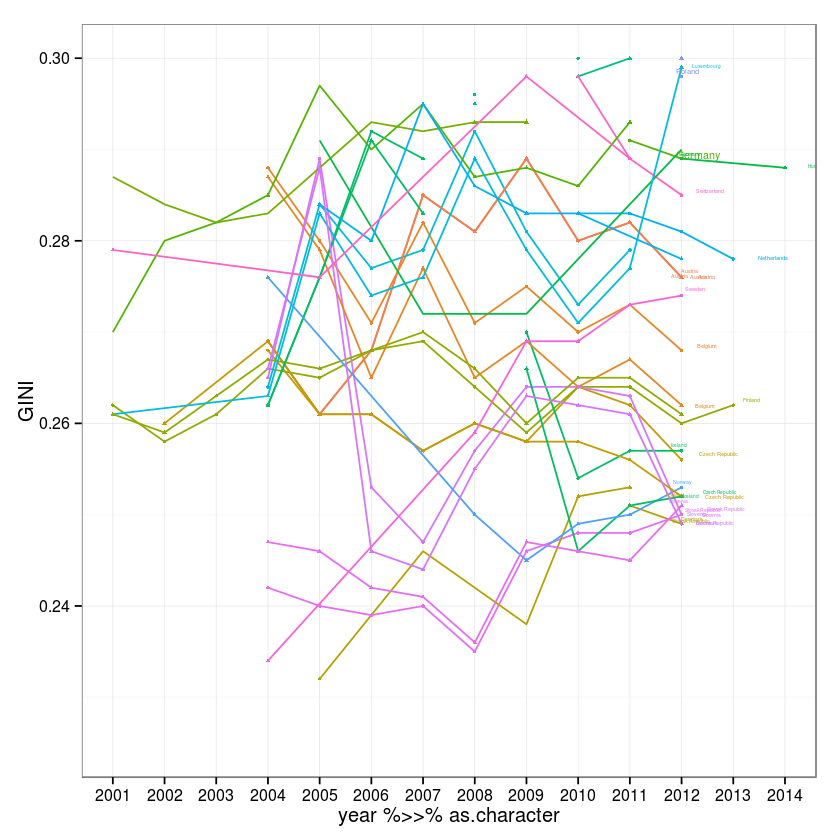

In [157]:
ggplot(data=X,
       aes(x=year %>>% as.character,
           y=GINI,
           color=location_name)) +
geom_line(aes(group=group)) +
geom_point(aes(size=IND/1E6, shape=methodo %>>% as.factor)) +
geom_text(aes(size=IND/1E4,label=location_name_label), position='jitter', hjust=-0.25, vjust=-0.25) +
scale_color_discrete(guide=FALSE) +
scale_shape_discrete(guide=FALSE) +
scale_size_continuous(guide=FALSE) +
ylim(c(0.225,0.3)) +
theme_bw()

#idd_dataframe[,.SD[year==max(year) & measure_code=='GINI', list(year, 'GINI'=observation)],by=location_name]

In [148]:
?geom_text

geom_text {ggplot2},R Documentation
mapping,"The aesthetic mapping, usually constructed with aes or aes_string. Only needs to be set at the layer level if you are overriding the plot defaults."
data,A layer specific dataset - only needed if you want to override the plot defaults.
stat,The statistical transformation to use on the data for this layer.
position,The position adjustment to use for overlapping points on this layer
parse,"If TRUE, the labels will be parsed into expressions and displayed as described in ?plotmath"
...,"other arguments passed on to layer. This can include aesthetics whose values you want to set, not map. See layer for more details."
